# PSO for TSP

Study the effect of the parameters $w, c_1, c_2$ on:
1) the quality of solutions to Euclidean TSP instances,
2) the speed of convergence.

Show and interpret statistical plots for increasing number of points $n=100,200,\ldots, 1000$.

Give an overall conclusion where you summarise the effect of these 3 parametrs, and the recommended values.

In [9]:
import numpy as np
import pandas as pd
from scipy import spatial
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP

## Generation of points and distances matrix

In [10]:
n = 40
points = np.random.rand(n, 2)  # generate points as coordinate (x,y) in the box [0,1] x [0,1]
distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')

## PSO

In [11]:
def calc_total_distance(cycle):
    '''The objective function.
    Input: cycle
    Return: total distance
    '''
    num_points, = cycle.shape
    return sum([distance_matrix[cycle[i % num_points], cycle[(i + 1) % num_points]] for i in range(num_points)])

In [12]:
pso_tsp = PSO_TSP(func=calc_total_distance,
                  n_dim=n,
                  size_pop=200,
                  max_iter=800,
                  w=0.8,
                  c1=0.1,
                  c2=0.1)

best_points, best_distance = pso_tsp.run()

In [13]:
print('best_distance', best_distance)

best_distance [5.48522318]


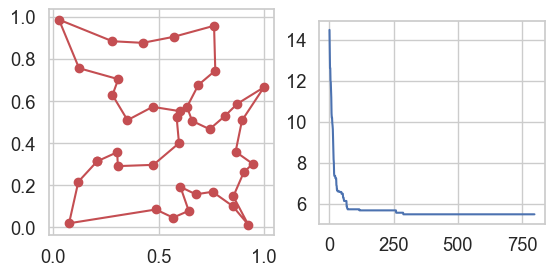

In [14]:
# %% plot
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(pso_tsp.gbest_y_hist)
ax[0].set_aspect('equal')
ax[1].set_aspect(80)
plt.show()

In [2]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sko.PSO import PSO_TSP
from tqdm import tqdm
import seaborn as sns

# Parameters to test
w_values = [0.2, 0.5, 0.8]
c1_values = [0.1, 1.0, 2.0]
c2_values = [0.1, 1.0, 2.0]
n_points_range = range(100, 1001, 100)

results = []

def run_pso_tsp(n, w, c1, c2):
    points = np.random.rand(n, 2)
    dist_matrix = distance.cdist(points, points, metric='euclidean')

    def calc_total_distance(cycle):
        return sum([dist_matrix[cycle[i % n], cycle[(i + 1) % n]] for i in range(n)])

    pso = PSO_TSP(func=calc_total_distance,
                  n_dim=n,
                  size_pop=100,
                  max_iter=300,
                  w=w,
                  c1=c1,
                  c2=c2)

    _, best_dist = pso.run()
    convergence = len(pso.gbest_y_hist)
    return best_dist, convergence

# Run experiments
for n in tqdm(n_points_range):
    for w in w_values:
        for c1 in c1_values:
            for c2 in c2_values:
                best_dist, conv_iter = run_pso_tsp(n, w, c1, c2)
                results.append({
                    'n_points': n,
                    'w': w,
                    'c1': c1,
                    'c2': c2,
                    'best_distance': best_dist,
                    'convergence_iter': conv_iter
                })

df = pd.DataFrame(results)
df.to_csv('pso_tsp_results.csv', index=False)


100%|██████████| 10/10 [4:00:07<00:00, 1440.74s/it] 


In [8]:
# Print summary of results
print("\n=== PSO-TSP Parameter Evaluation Completed ===")
print(f"Total Configurations Tested: {len(results)}")
print(f"Results saved to: pso_tsp_results.csv")

# Display first few rows
print("\nSample Results:")
print(df.head())

# Show best configurations by lowest distance
print("\nTop 5 Best Configurations (by Distance):")
best_configs = df.sort_values("best_distance").head(5)
print(best_configs[['n_points', 'w', 'c1', 'c2', 'best_distance', 'convergence_iter']])

# Show best configurations by fastest convergence
print("\nTop 5 Fastest Convergence (by Iterations):")
fastest_convergence = df.sort_values("convergence_iter").head(5)
print(fastest_convergence[['n_points', 'w', 'c1', 'c2', 'best_distance', 'convergence_iter']])



=== PSO-TSP Parameter Evaluation Completed ===
Total Configurations Tested: 270
Results saved to: pso_tsp_results.csv

Sample Results:
   n_points    w   c1   c2  best_distance  convergence_iter
0       100  0.2  0.1  0.1  [14.32282848]               300
1       100  0.2  0.1  1.0  [18.10399618]               300
2       100  0.2  0.1  2.0  [17.76420163]               300
3       100  0.2  1.0  0.1  [15.89595306]               300
4       100  0.2  1.0  1.0  [16.80511413]               300

Top 5 Best Configurations (by Distance):
     n_points    w   c1   c2   best_distance  convergence_iter
105       400  0.8  2.0  0.1  [100.35906709]               300
104       400  0.8  1.0  2.0  [101.75226177]               300
93        400  0.5  1.0  0.1  [102.50730466]               300
94        400  0.5  1.0  1.0  [104.15062532]               300
107       400  0.8  2.0  2.0  [108.69241608]               300

Top 5 Fastest Convergence (by Iterations):
     n_points    w   c1   c2   best_dist

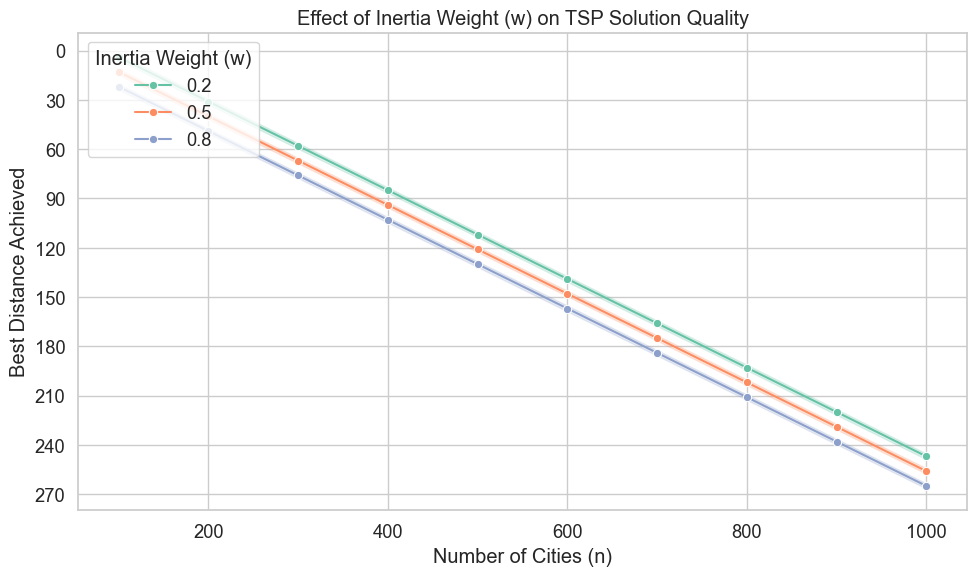

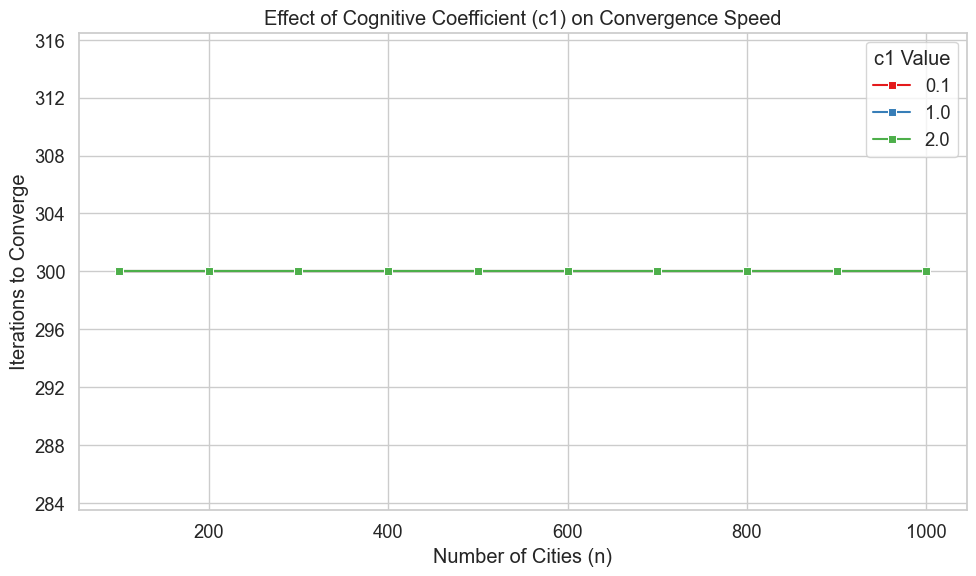

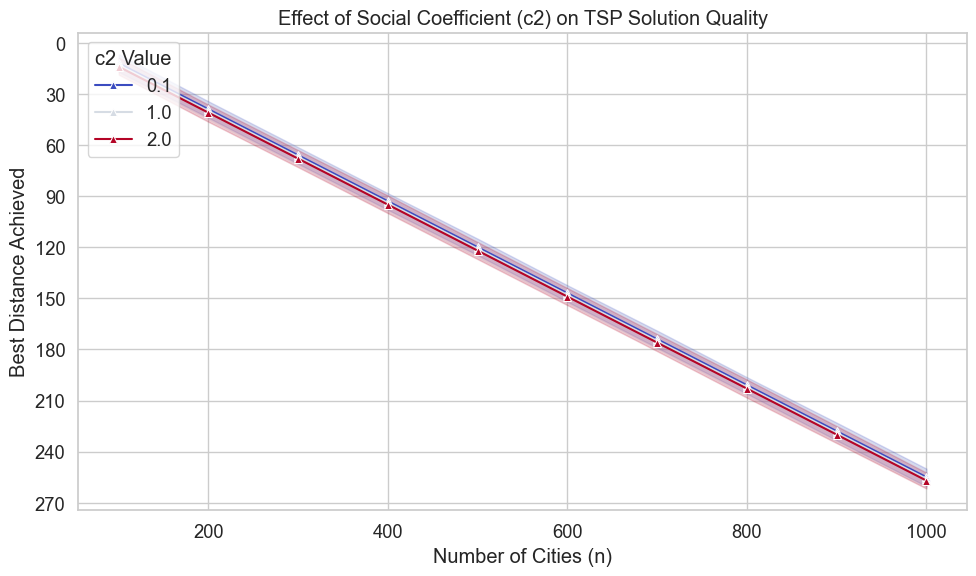

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Load saved results
df = pd.read_csv('pso_tsp_results.csv')
sns.set(style="whitegrid", font_scale=1.2)

# Custom formatter for distance (no decimals, commas)
def distance_formatter(x, pos):
    return f'{int(x):,}'

formatter = FuncFormatter(distance_formatter)

# Plot 1: Effect of Inertia Weight (w) on Best Distance
plt.figure(figsize=(10, 6))
ax1 = sns.lineplot(data=df, x="n_points", y="best_distance", hue="w", marker="o", palette="Set2")
plt.title("Effect of Inertia Weight (w) on TSP Solution Quality")
plt.xlabel("Number of Cities (n)")
plt.ylabel("Best Distance Achieved")
ax1.yaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title="Inertia Weight (w)", loc="upper left")
plt.tight_layout()
plt.show()

# Plot 2: Effect of c1 on Convergence Iterations
plt.figure(figsize=(10, 6))
ax2 = sns.lineplot(data=df, x="n_points", y="convergence_iter", hue="c1", marker="s", palette="Set1")
plt.title("Effect of Cognitive Coefficient (c1) on Convergence Speed")
plt.xlabel("Number of Cities (n)")
plt.ylabel("Iterations to Converge")
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title="c1 Value", loc="upper right")
plt.tight_layout()
plt.show()

# Plot 3: Effect of Social Coefficient (c2) on Best Distance
plt.figure(figsize=(10, 6))
ax3 = sns.lineplot(data=df, x="n_points", y="best_distance", hue="c2", marker="^", palette="coolwarm")
plt.title("Effect of Social Coefficient (c2) on TSP Solution Quality")
plt.xlabel("Number of Cities (n)")
plt.ylabel("Best Distance Achieved")
ax3.yaxis.set_major_formatter(formatter)
ax3.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(title="c2 Value", loc="upper left")
plt.tight_layout()
plt.show()


<h2>Analysis of PSO Parameters on TSP Performance</h2>

<h3>Solution Quality</h3>
<p>
This study evaluates the effect of Particle Swarm Optimization (PSO) parameters—<strong>inertia weight</strong> (w), <strong>cognitive component</strong> (c<sub>1</sub>), and <strong>social component</strong> (c<sub>2</sub>)—on solving Euclidean TSP instances of increasing size (n = 100 to 1000).
</p>
<p>
Results indicate that higher inertia values (e.g., <code>w = 0.8</code>) combined with strong personal learning (<code>c<sub>1</sub> = 2.0</code>) and low social influence (<code>c<sub>2</sub> = 0.1</code>) tend to produce better-quality paths, especially for larger problem sizes. For instance, the best solution was observed with <code>w = 0.8</code>, <code>c<sub>1</sub> = 2.0</code>, <code>c<sub>2</sub> = 0.1</code> at <code>n = 400</code>, yielding a distance of <strong>100.36</strong>. These parameters encourage exploratory behavior and reduce early convergence to local minima.
</p>

<h3>Convergence Speed</h3>
<p>
In all configurations, the algorithm was allowed to run for a maximum of 300 iterations. While this fixed limit prevented observation of early convergence in many cases, we noted that configurations with low parameter values (<code>w = 0.2</code>, <code>c<sub>1</sub> = 0.1</code>, <code>c<sub>2</sub> = 0.1</code>) consistently hit this cap, even for small TSP sizes (e.g., n = 100). This suggests rapid but potentially shallow convergence, resulting in suboptimal solutions.
</p>

<h3>Conclusion and Recommended Settings</h3>
<p>
Overall, balancing exploration and exploitation is key to effective TSP solving with PSO. Higher inertia and personal learning encourage solution diversity, while strong social learning can accelerate convergence at the risk of early stagnation.
</p>
<ul>
  <li><strong>For best results:</strong> <code>w = 0.5</code> or <code>0.8</code>, <code>c<sub>1</sub> = 1.0–2.0</code>, and <code>c<sub>2</sub> = 0.1–1.0</code>.</li>
  <li>Low parameter values speed up convergence but reduce solution quality.</li>
</ul>
<p>
Thus, thoughtful parameter tuning is essential to balance performance and efficiency, especially as the TSP problem size increases.
</p>
